# Global Average Earth Temperature 

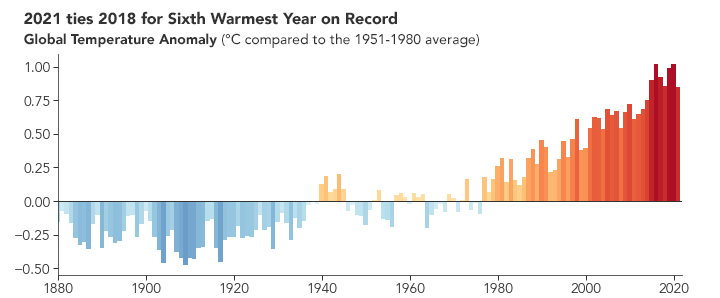

In [2]:
import numpy as np #algebra 
import pandas as pd #dataset
import matplotlib.pyplot as plt #plotting
import datetime as dt 
from scipy.stats import pearsonr #statistics 
from sklearn.model_selection import train_test_split #ML
from sklearn.linear_model import LinearRegression #ML
from sklearn.preprocessing import PolynomialFeatures
import piecewise_regression
from utils.utils import r_squared

### Load data 

In [3]:
db = pd.read_csv('./data/GlobalTemperatures.csv') 

In [4]:
db.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("start date = ", min(db.dt))
print("end date = ", max(db.dt))

start date =  1750-01-01
end date =  2015-12-01


In [6]:
db.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [7]:
db.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### Plot Avg Temperature per year 

In [70]:
db['Date'] = pd.to_datetime(db.dt, format='%Y-%d-%m')
db['Year'] = db['Date'].dt.year
db['Date'] = db['Date'].map(dt.datetime.toordinal)

In [9]:
df = db.groupby('Year')['LandAverageTemperature'].mean().reset_index()

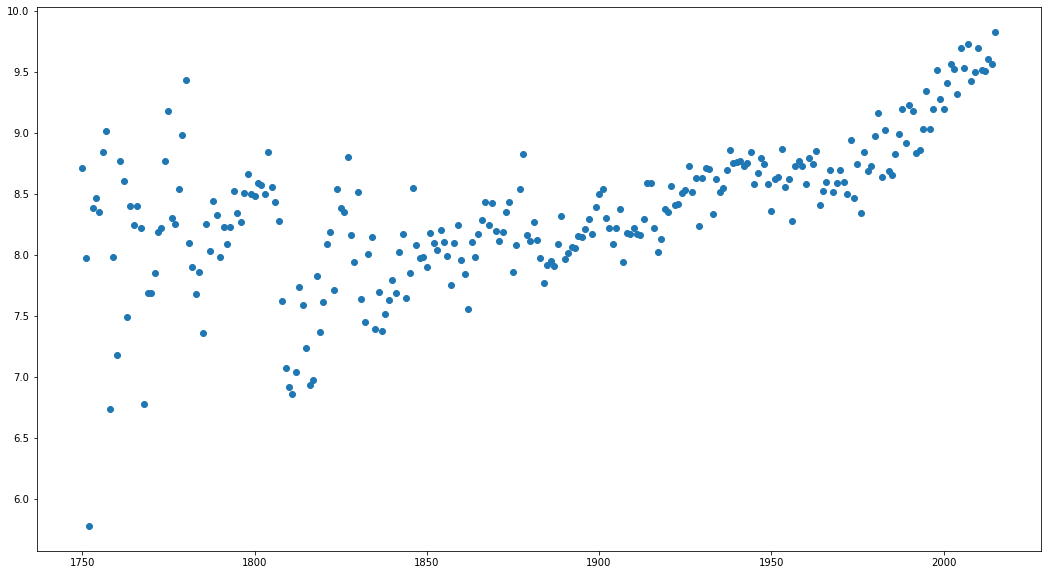

In [10]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature')
plt.show()

### Study the trend

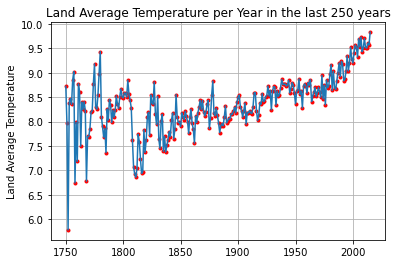

In [11]:
ax = df['LandAverageTemperature'].plot(style='.', grid=True, c='r')
ax = df['LandAverageTemperature'].plot(grid=True)
ax.set(title="Land Average Temperature per Year in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

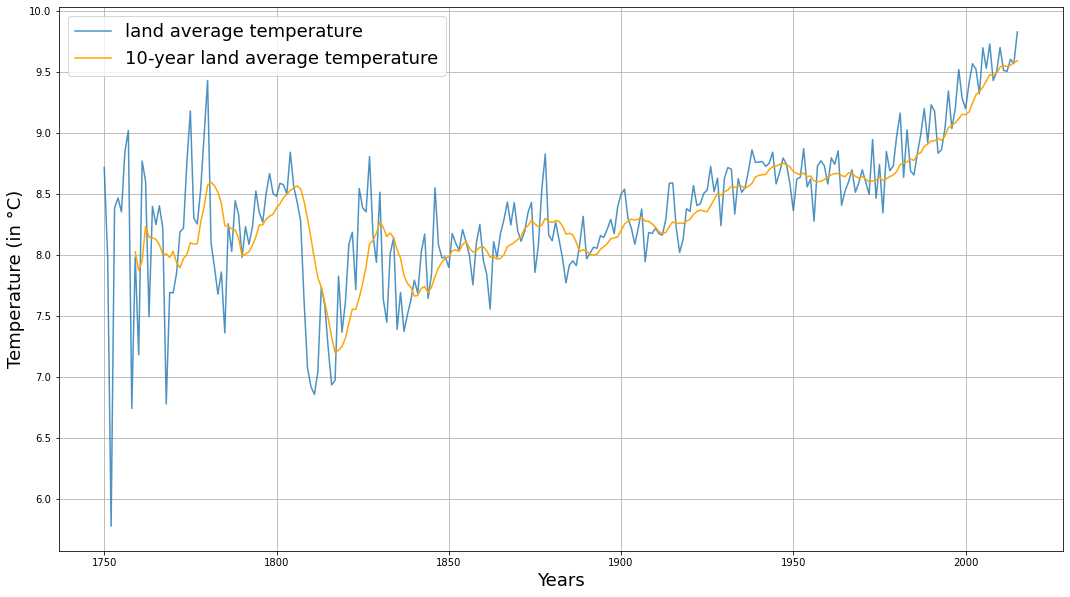

<Figure size 432x288 with 0 Axes>

In [12]:
temp = df['LandAverageTemperature']
df['10'] = temp.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['LandAverageTemperature'], alpha=0.8, label='land average temperature')
ax.plot(df['10'], color="orange", label='10-year land average temperature')
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature (in °C)', fontsize=18)
plt.grid()
plt.legend(fontsize=18)
plt.show()
plt.clf()

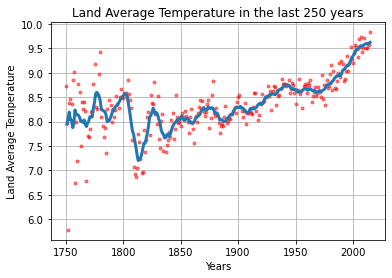

In [13]:
trend = df['LandAverageTemperature'].rolling(
    window=10,
    center=True,
    min_periods=6,
).mean()

ax = df['LandAverageTemperature'].plot(style='.', grid=True, c='r', alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3, grid=True)
ax.set(title="Land Average Temperature in the last 250 years", ylabel="Land Average Temperature", xlabel="Years")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

### Fit linear models

In [15]:
corr, p = pearsonr(df['Year'], df['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.6223364823755806


In [124]:
lr = LinearRegression() # initialize a linear model 

In [17]:
X = df['Year']
y = df['LandAverageTemperature'] # target variable 
X = X.values.reshape(-1,1) # predictor 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8) 

In [19]:
lr.fit(X_train, y_train)
print("In-sample R**2 = ", lr.score(X_train, y_train))
print("Out-of-sample R**2 = ", lr.score(X_test, y_test))

In-sample R**2 =  0.4118522427748421
Out-of-sample R**2 =  0.2765342245403204


In [20]:
y_pred = lr.predict(X_test)
years = pd.DataFrame(X_test)

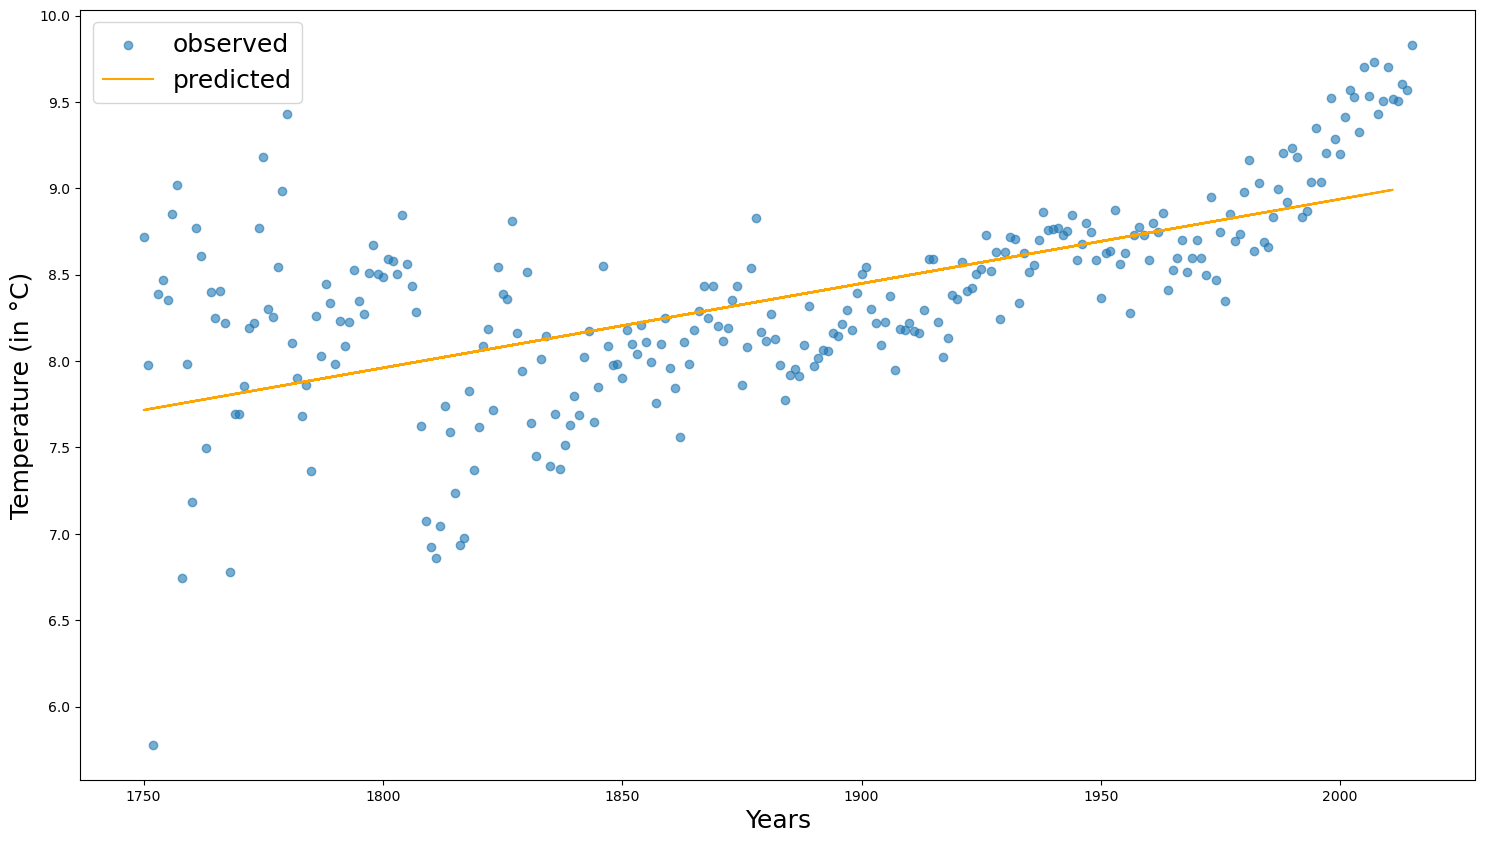

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.legend(["observed", "predicted"], fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature (in °C)', fontsize=18)
plt.show()
plt.clf()

In [38]:
#print(lr.coef_)
#print(lr.intercept_)

### Fit non-linear models

In [45]:
poly = PolynomialFeatures(degree=3)
X3 = poly.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, train_size = 0.8) 

In [48]:
lr3 = LinearRegression(fit_intercept=False)
lr3.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [49]:
print("In-sample R**2 = ", lr3.score(X_train, y_train))
print("Out-of-sample R**2 = ", lr3.score(X_test, y_test))

In-sample R**2 =  0.5209306796501092
Out-of-sample R**2 =  0.5830378825698257


In [51]:
y_pred = lr3.predict(X_test)
years = pd.DataFrame(X_test)

In [70]:
sort_x, sort_y = zip(*sorted(zip(X_test[:,1], y_pred)))

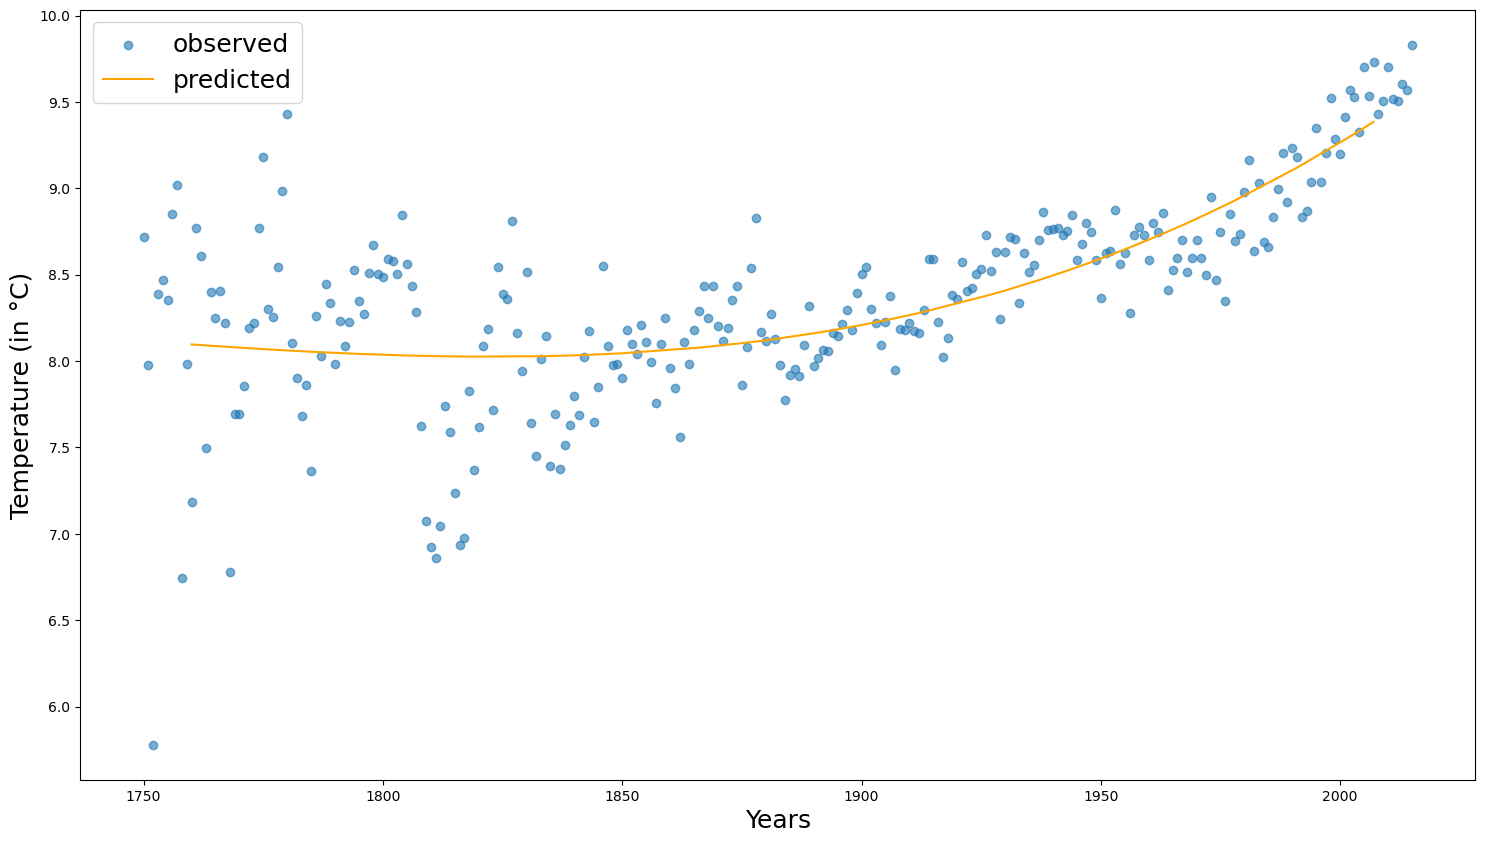

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(sort_x, sort_y, color="orange")
plt.legend(["observed", "predicted"], fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature (in °C)', fontsize=18)
plt.show()
plt.clf()

### Ex1: 

Divide the years in a number of intervals of your choice (criterion followed?) and try to fit different models per each interval. Do you get a better fit wrt the global linear model? How many breakpoints did you use? 

In [22]:
pw_fit = piecewise_regression.Fit(X_train.squeeze(), y_train.to_numpy(), n_breakpoints=1)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                      212
No. Model Parameters                    4
Degrees of Freedom                    208
Res. Sum of Squares               32.1064
Total Sum of Squares              71.8956
R Squared                        0.553430
Adjusted R Squared               0.544800
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                17.8293          3.1       5.7505      3.14e-08       11.717       23.942
alpha1           -0.00545997      0.00173      -3.1649       0.00178    -0.008861   -0.0020589
beta1              0.0137573      0.00185        7.444             -     0.010114     0.017401
breakpoint1          1838.01         8.01            -             -       1822.2       1853.8
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      212\nNo. Model Parameters                    4\nDegrees of Freedom                    208\nRes. Sum of Squares               32.1064\nTotal Sum of Squares              71.8956\nR Squared                        0.553430\nAdjusted R Squared               0.544800\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                17.8293          3.1       5.7505      3.14e-08       11.

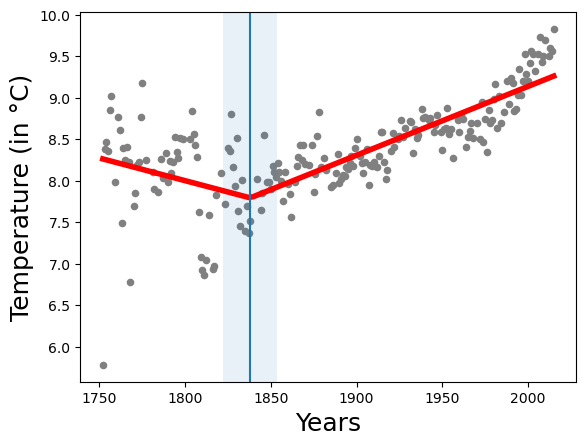

In [23]:
# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=4)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature (in °C)', fontsize=18)
plt.show()
plt.close()

In [24]:
c = pw_fit.get_results()["estimates"]["const"]["estimate"]
a1 = pw_fit.get_results()["estimates"]["alpha1"]["estimate"]
a2 = pw_fit.get_results()["estimates"]["alpha2"]["estimate"]
b = pw_fit.get_results()["estimates"]["breakpoint1"]["estimate"]

In [25]:
def piecewise_linear(x, c, a1, a2, b):
    x = x.squeeze()
    return(c + a1*x + (a2-a1) *np.maximum(x-b, np.zeros(len(x))))

In [26]:
y_pred = piecewise_linear(X_test, c, a1, a2, b)

In [28]:
print("In-sample R**2 = ", r_squared(y_train.to_numpy(),piecewise_linear(X_train, c, a1, a2, b)))
print("Out-of-sample R**2 = ", r_squared(y_test.to_numpy(),y_pred))

In-sample R**2 =  0.5534296504804563
Out-of-sample R**2 =  0.36187435967915227


### CO2 Data

In [53]:
co2 = pd.read_csv('./data/monthly_in_situ_co2_mlo.csv', skiprows=54)

In [55]:
co2 = co2.drop(labels=[0,1], axis=0).reset_index()

In [58]:
co2.columns = ['index', '  Yr', ' Mn', '    Date', '      Date', '     CO2',
       'seasonally', '        fit', '  seasonally', '      CO2',
       ' seasonally']

In [64]:
co2 = co2.drop(columns = ['index', '    Date', '      Date',
       'seasonally', '        fit', '  seasonally', '      CO2',
       ' seasonally'])

In [66]:
co2.columns = ["year", "month", "CO2"]

In [89]:
co2["date"] = pd.to_datetime((co2["year"].apply(str)+"-"+co2["month"].apply(str)).str.replace(" ",""), format='%Y-%m')

In [100]:
temp = db[["dt", 'LandAverageTemperature']]

In [102]:
temp["date"] = pd.to_datetime(temp["dt"], format='%Y-%m')

/Users/Michele/mambaforge/envs/polito/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
ct = pd.merge(co2, temp, on="date")

In [112]:
ct["CO2"] = pd.to_numeric(ct["CO2"])

In [113]:
ct = ct[ct["CO2"]>0]

In [141]:
ct_yr = ct.groupby('year')['LandAverageTemperature',"CO2"].mean().reset_index()
ct_yr["year"] = pd.to_numeric(ct_yr["year"])

/Users/Michele/mambaforge/envs/polito/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [214]:
X_tr = ct_yr[ct_yr["year"]<=2010]["CO2"].to_numpy()
y_tr = ct_yr[ct_yr["year"]<=2010]["LandAverageTemperature"]
X_te = ct_yr[ct_yr["year"]>2010]["CO2"].to_numpy()
y_te = ct_yr[ct_yr["year"]>2010]["LandAverageTemperature"]

In [216]:
lr = LinearRegression()
lr.fit(X_tr.reshape(-1, 1), y_tr)

LinearRegression()

In [217]:
print("In-sample R**2 = ", lr.score(X_tr.reshape(-1, 1), y_tr))
print("Out-of-sample R**2 = ", lr.score(X_te.reshape(-1, 1), y_te))

In-sample R**2 =  0.5896008999135408
Out-of-sample R**2 =  0.329665563118391


In [218]:
X = ct_yr["CO2"].to_numpy()
y = ct_yr["LandAverageTemperature"]
yr = ct_yr["year"]

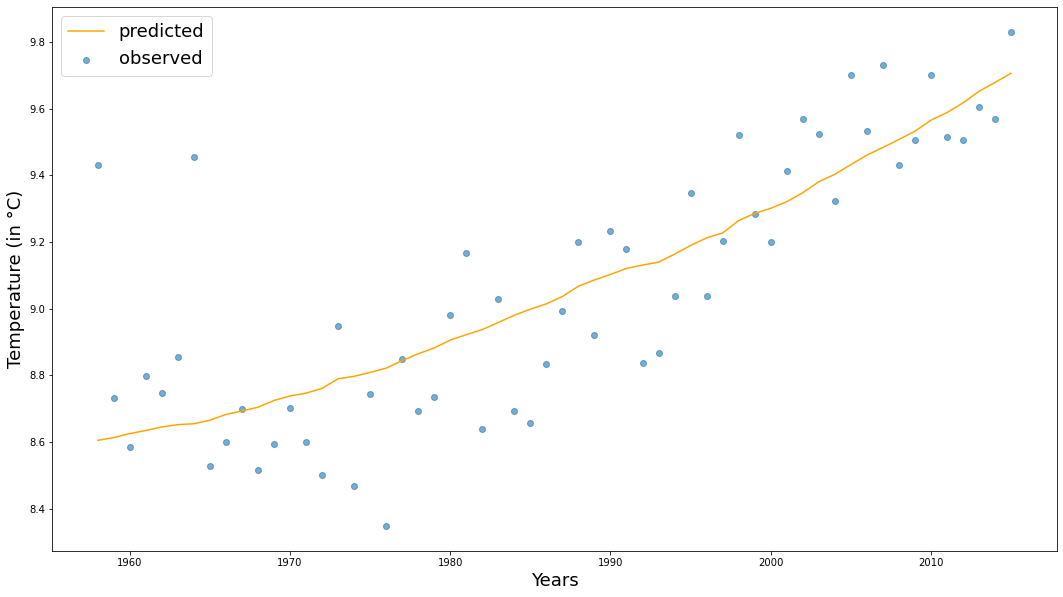

<Figure size 432x288 with 0 Axes>

In [219]:
plt.figure(figsize=(18,10))
plt.scatter(yr, y, alpha=0.6)
plt.plot(yr, lr.predict(X.reshape(-1, 1)), color="orange")
plt.legend(["predicted", "observed"], fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature (in °C)', fontsize=18)
plt.show()
plt.clf()

In [220]:
co2["year"] = pd.to_numeric(co2["year"])
co2["CO2"] = pd.to_numeric(co2["CO2"])
co2_yr = co2.groupby('year')["CO2"].mean().reset_index()

In [221]:
X_extr = co2_yr[(co2_yr["year"]>2015) & (co2_yr["year"]<2022)]["CO2"].to_numpy()

In [222]:
y_extr = lr.predict(X_extr.reshape(-1,1))

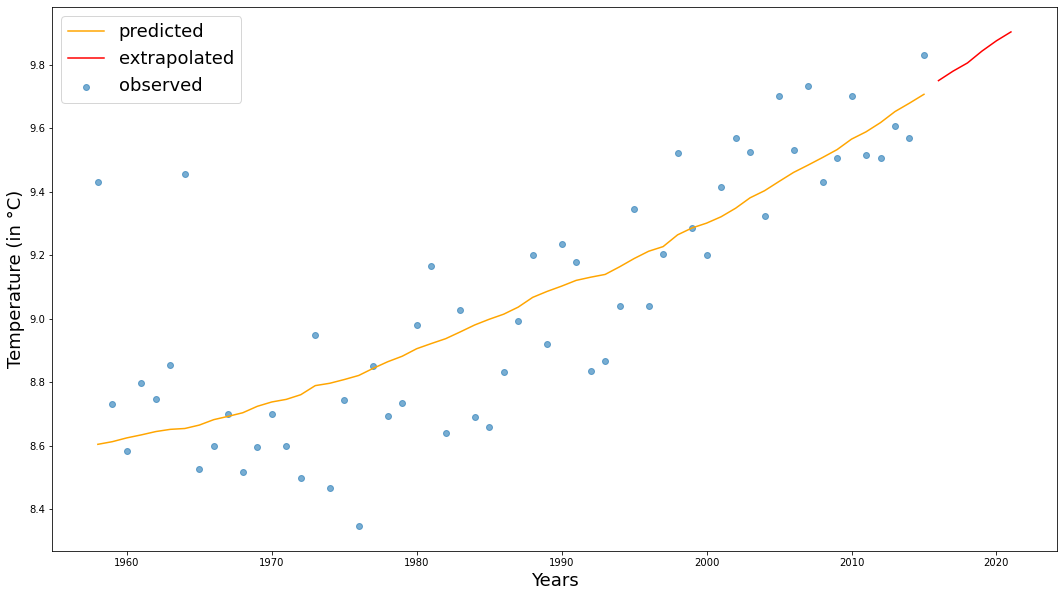

<Figure size 432x288 with 0 Axes>

In [223]:
plt.figure(figsize=(18,10))
plt.scatter(yr, y, alpha=0.6)
plt.plot(yr, lr.predict(X.reshape(-1, 1)), color="orange")
plt.plot(list(range(2016,2022)), y_extr, color="red")
plt.legend(["predicted", "extrapolated", "observed"], fontsize=18, )
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature (in °C)', fontsize=18)
plt.show()
plt.clf()

### Ex2:

Are we sure the relationship between average temperature and CO2 is linear? Study their trends and apply the most suitable transformation to the data and see if you can improve the performance of the linear model to get a better estimate of future land temperature.  

### Ex3: 

Both temperature and CO2 data contain daily as well as seasonal trends. How could you estimate them? Can you find a way to "deseasonalize" the time series? If you can do that, then study the problem on the data without seasonal variations (e.g. plots, correlations, models). 